Hello Team,

In my little experience with Data Science and Analysis, I deem it very important to understand the nature of the dataset we are presented with and the outcome or finished product expected at the end of the whole process.
The dataset provided is a fuel quality data containing information on the different details of power plants spread across the state ranging from the following:

    Record ID- Serial numbers for the different plants
    Utility ID- Utility id assigned by the FERC
    Report year- the different years during which the data was reported
    Plant name- the different names of plants 
    Fuel type code pudl – represents the different types of fuel used across different plants for different years 
    Fuel unit – the units of measurement for the amounts of different fuel types used in the plants
    Fuel Qty burned- represents the total quantity of fuel burned/used during a particular year in a plant
    Fuel mmbutu per unit – represent the amount of fuel in mmbutu(unit) used per unit in a plant
    Fuel cost per unit burned – cost of fuel per unit burned
    Fuel cost per unit delivered- he cost of fuel delivered per unit (not sure as no number of total units delivered to the plant was given)
    Fuel cost per mmbtu- the value of fuel used in a plant per mmbutu.

At the end of our analysis we should be able to identify the power plant usage patterns for each years, the cost of operation, the most commonly used resources (fuel type) for different regions in different years an also the changes in use of these fuel types over the years.
With these insights, the best decisions to increase the productivity and efficiency of these power plants can be obtained.

    The procedures taken are listed below:
    •	CLEANING, 
    •	WRANGLING,
    •	EXPLORING, 
    •	INTERESTING VISUALISATIONS


In [32]:
#importing the needed libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [33]:
#using pandas to import the dataset into the framework
df=pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')
df.head() #prints out the first 5 rows of all features in the dataframe

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


# DATA CLEANING AND WRANGLING

In [34]:
df.columns #prints out the names of features in the dataset

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [35]:
df.shape #outputs the shape/ dimensions of the dataframe

(29523, 11)

In [36]:
#check the information about the dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [37]:
#describeS numerical parameters for the features in the dataframe
df.describe(include='all') #describes all features

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1997_12_89_0_1,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [38]:
#to obtain the feautures with missing values and the number of rows with missing values
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [39]:
#to obtain the unique values in the feature(fuel_unit) with the missing values(Nan) and its number of occurernce
df.fuel_unit.value_counts() 

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [40]:
#after proper analysis of the data, I was able to predict the missing values using other rows with similar features
df[['fuel_type_code_pudl','fuel_unit']][df.fuel_unit.isnull()]

,fuel_type_code_pudl,fuel_unit
66,oil,NaN
152,nuclear,NaN
277,other,NaN
626,nuclear,NaN
627,nuclear,NaN
...,...,...
28413,gas,NaN
28828,oil,NaN
28830,oil,NaN
29052,coal,NaN


In [41]:
#output shows the relationship betweeen the two features
#Note that for the diffferent fuel type, a particular unit of measurement is commonly used.
#There is therefore a high probability that the missing values under the fuel_unit feature is the most common for each fuel type 
df.groupby('fuel_type_code_pudl')['fuel_unit'].value_counts()

fuel_type_code_pudl  fuel_unit
coal                 ton           8438
                     mmbtu           52
                     mcf              5
                     bbl              1
gas                  mcf          11333
                     mmbtu           94
                     ton              4
                     bbl              2
nuclear              gramsU         464
                     kgU            110
                     mwhth          100
                     mwdth           95
                     mmbtu           34
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                ton             77
                     bbl             42
                     mcf              9
                     gal              3
waste                ton            436
                     bbl              1
Name: fuel_unit, dtype: int64

In [42]:
#the unique feature outputs a set of all kinds of values that is found in the feature
df.fuel_type_code_pudl.unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [43]:
#using the 'fuel_type_code_pudl' feature to determine the missing values in the 'fuel_unit' feature
null=df.fuel_type_code_pudl.unique()
for i in null:
    df['fuel_unit'][(df.fuel_unit.isnull())&(df.fuel_type_code_pudl == i)]=\
    df[df['fuel_type_code_pudl']==i]['fuel_unit'].value_counts().index[0]

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## To ensure the missing values have been dealt with

In [44]:
df.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [45]:
#checking for duplicated values
df.duplicated().sum()
#output shows that all missing values(Nan) have been taken care of

0

In [46]:
#using the groupby() command the the dataframe is restructured using the intended feature as index.
#the first() function output the first rows having the each unique value in the reference feature
df.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [47]:
#after grouping the dataframe using a particular feature,
#the count() function output the number of rows having the each unique value in the reference feature
df.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        8019
gal          84
gramsU      479
kgU         110
mcf       11407
mmbtu       180
mwdth        95
mwhth       100
ton        9049
Name: fuel_unit, dtype: int64

In [48]:
#to select a sample of the dataset
sample_df= df.sample(frac=0.1,random_state=5)
sample_df

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
25995,f1_fuel_2015_12_56_0_7,56,2015,turkey point 5,oil,bbl,11890.0,5.773992,60.517,60.517,10.481
21007,f1_fuel_2011_12_42_3_13,42,2011,conesville,coal,ton,184054.0,23.028000,81.406,88.903,3.535
28129,f1_fuel_2017_12_100_0_11,100,2017,hinds,gas,mcf,21490609.0,1.063191,3.228,0.000,3.036
25499,f1_fuel_2015_12_7_6_13,7,2015,west phoenix 4,gas,mcf,993478.0,1.040983,5.271,2.843,5.064
25034,f1_fuel_2014_12_98_0_4,98,2014,laskin,coal,ton,268369.0,17.584000,29.136,28.134,1.657
...,...,...,...,...,...,...,...,...,...,...,...
5942,f1_fuel_1999_12_98_0_4,98,1999,laskin,coal,ton,389378.0,18.660000,21.690,21.820,1.162
10457,f1_fuel_2002_12_151_1_1,151,2002,ontario station 13,nuclear,gramsU,578.0,0.000070,27.860,27.860,0.398
28450,f1_fuel_2017_12_7_5_14,7,2017,palo verde 1,nuclear,kgU,476.0,0.066704,51417.892,2803.917,0.781
9789,f1_fuel_2002_12_6_0_10,6,2002,glen lyn,coal,ton,686750.0,25.650000,37.988,37.524,1.481


# DATA VISUALISATION

    Data Visualisations are necessary to enable Data Scientists, Clients and all other parties involved easily understand the existing relationships between features and labels in a dataset.  It helps to generate meaningful insights for business intelligence too amongst many other applications

<IPython.core.display.Javascript object>


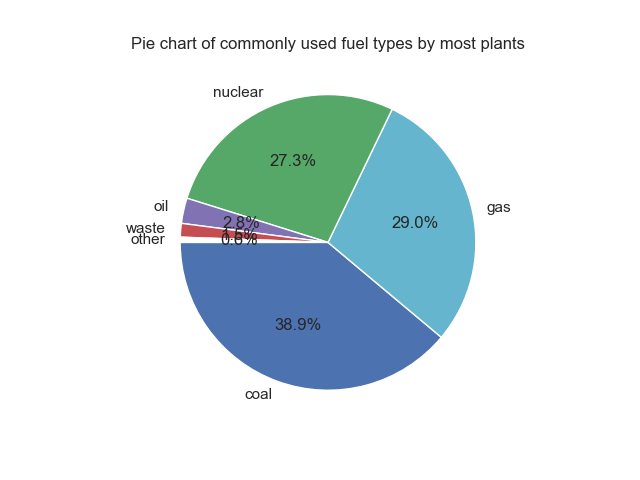

In [62]:
%matplotlib notebook
plt.pie(df.fuel_type_code_pudl.value_counts(),colors='bcgmrwy',radius=1,data=df,autopct='%.1f%%',startangle=180,labels=df.fuel_type_code_pudl.unique())
plt.title('Pie chart of commonly used fuel types by most plants')
plt.show()

#this shows the relationship commonly used fuel types in each plant 

### The pie chart above shows that majority of plants make use of the coal fuel type for its operations followed by nuclear and gas, while others fuel types such as oil,water, other were not in much demand when compared to the other fuel types.


<IPython.core.display.Javascript object>


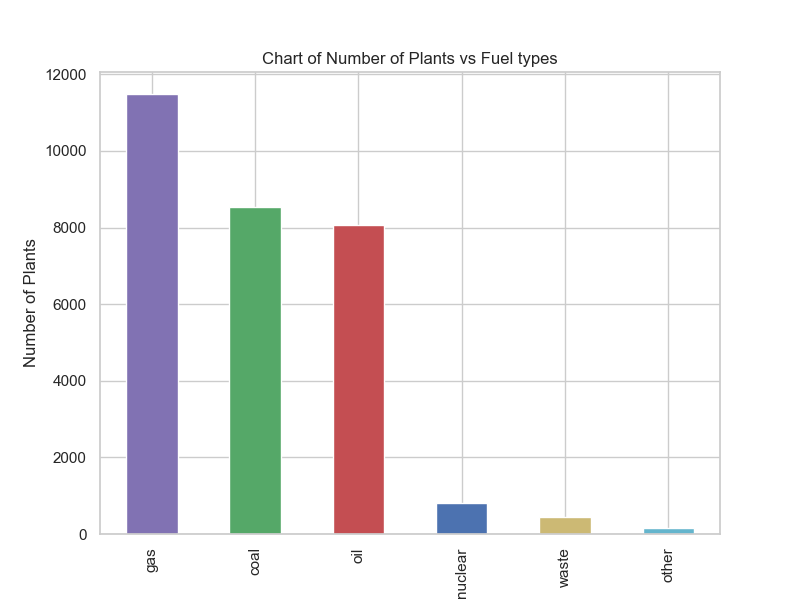

In [63]:
plt.figure(figsize=(8,6))
df.fuel_type_code_pudl.value_counts().plot(kind='bar',color=["m", "g",'r','b','y','c'])
plt.xlabel('Fuel types')
plt.ylabel('Number of Plants')
plt.title('Chart of Number of Plants vs Fuel types')
plt.show()
#this shows the number of plants using the different fuel types 

<IPython.core.display.Javascript object>


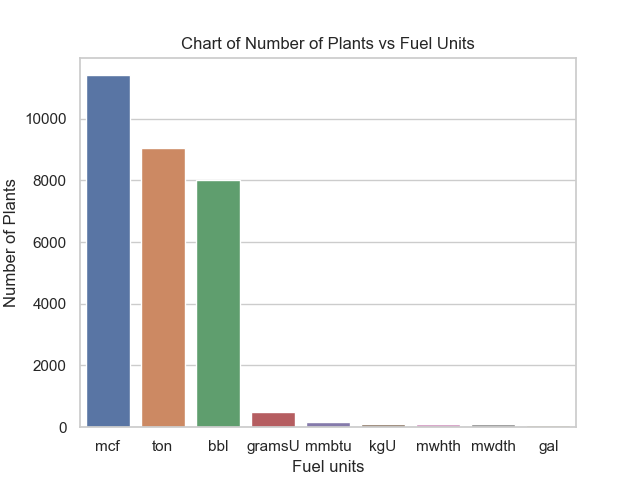

In [64]:
%matplotlib notebook
sns.barplot(df.fuel_unit.value_counts().index,df.fuel_unit.value_counts())
plt.xlabel('Fuel units')
plt.ylabel('Number of Plants')
plt.title('Chart of Number of Plants vs Fuel Units')
plt.show()
#this plot shows the commonlky used fuel units by plants 

<IPython.core.display.Javascript object>


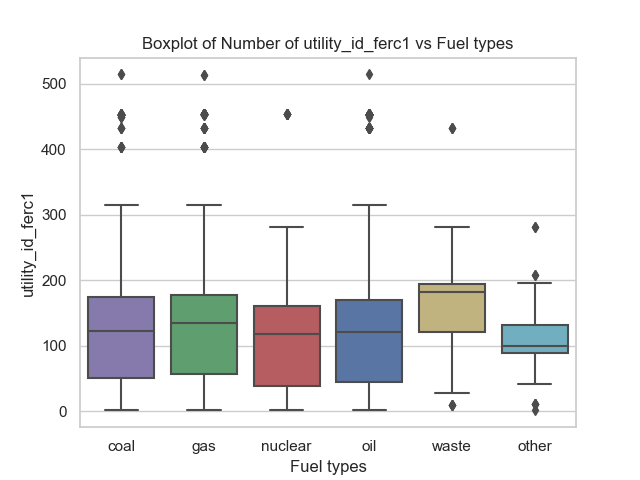

In [65]:
# Box plot
%matplotlib notebook
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",palette=["m", "g",'r','b','y','c'], data=df)
plt.xlabel('Fuel types')
plt.ylabel('utility_id_ferc1')
plt.title('Boxplot of Number of utility_id_ferc1 vs Fuel types')
plt.show()

## A boxplot shows parameters such as percentiles,max,min for the different unique values under a feature in a dataset
### In the boxplot above the the 25th, 50th and 75th percentiles and also the max and min values for each fuel types are plotted respectively

In [53]:
#to show the extent of correlation between features and labels in dataset using pearsonr, kendall or spearman correlation
df.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


<IPython.core.display.Javascript object>


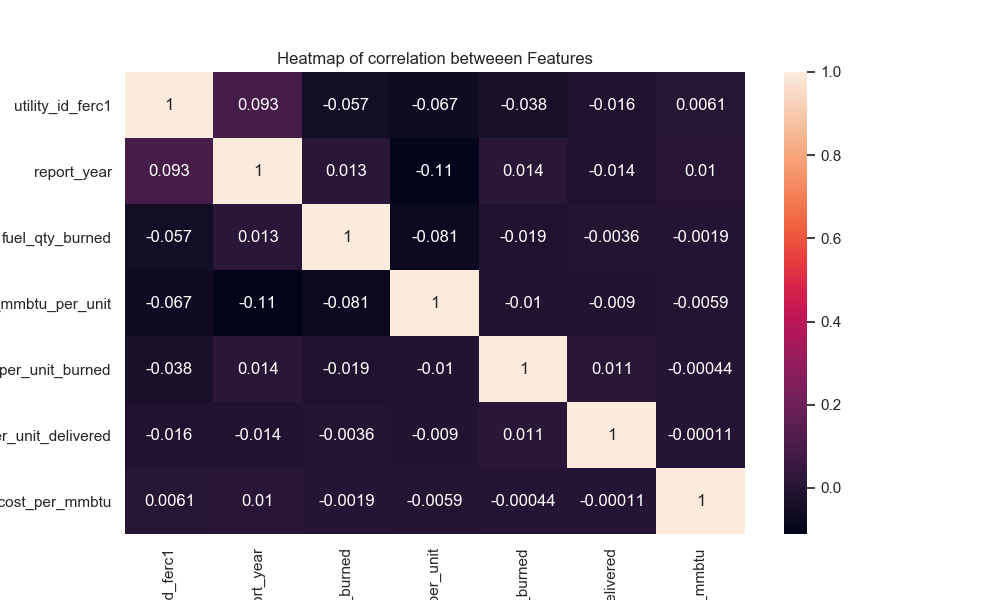

In [66]:
#Use Seaborns heatmap to obtain the correlation between features in the dataset
%matplotlib notebook
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of correlation betweeen Features')
plt.show()

## HEATMAP
    from the heatmap above, it shows that there is litlle or no correlation at all between the features in the dataset.
    this result could be as a result of some outliers in the dataset, we therefore use a sample of the dataset to confirm       this result or speculation

<IPython.core.display.Javascript object>


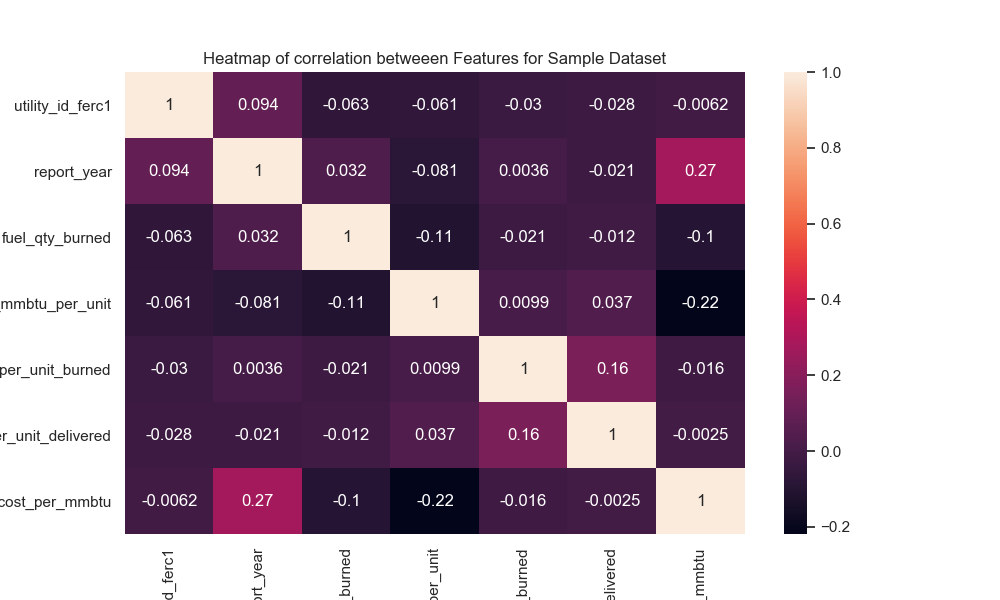

In [67]:
%matplotlib notebook
plt.figure(figsize=(10,6))
sns.heatmap(sample_df.corr(),annot=True)
plt.title('Heatmap of correlation betweeen Features for Sample Dataset')
plt.show()

    After using a random sample of the dataset, we can see that there are exisiting correlaitons between features which are  considerably significant

<IPython.core.display.Javascript object>


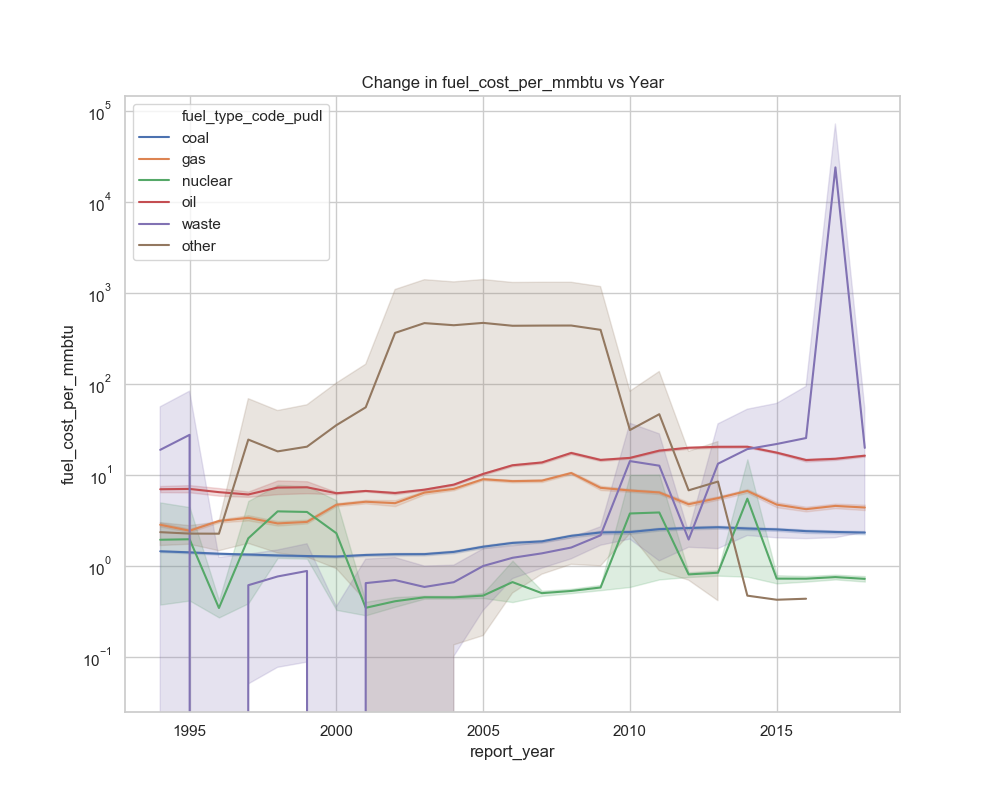

In [68]:
%matplotlib notebook
plt.figure(figsize=(10,8))
x=sns.lineplot(x='report_year', y='fuel_cost_per_mmbtu',hue='fuel_type_code_pudl',data=df)
sns.set(style="whitegrid")
x.set_yscale("log")
plt.title(' Change in fuel_cost_per_mmbtu vs Year ')
plt.show()

# Lineplot 
     The chart above shows the change(fall and rise) of fuel cost of differrent fuels per mmbutu for each year.
     When this data is compared with the demand of each fuel type per year, we would be able to determine which fuel type is optimal to run a different plants at different locations.

# NUMERICAL FEATURES
### In the previous charts we focused on the categorical variables, but in the next section charts below we would we dealing with the Numerical features to determine the nature of relationships in between them. We can also use this as an opportunity to hint at what model would be most suitable for the training, validation and prediction.

In [57]:
df.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

<IPython.core.display.Javascript object>


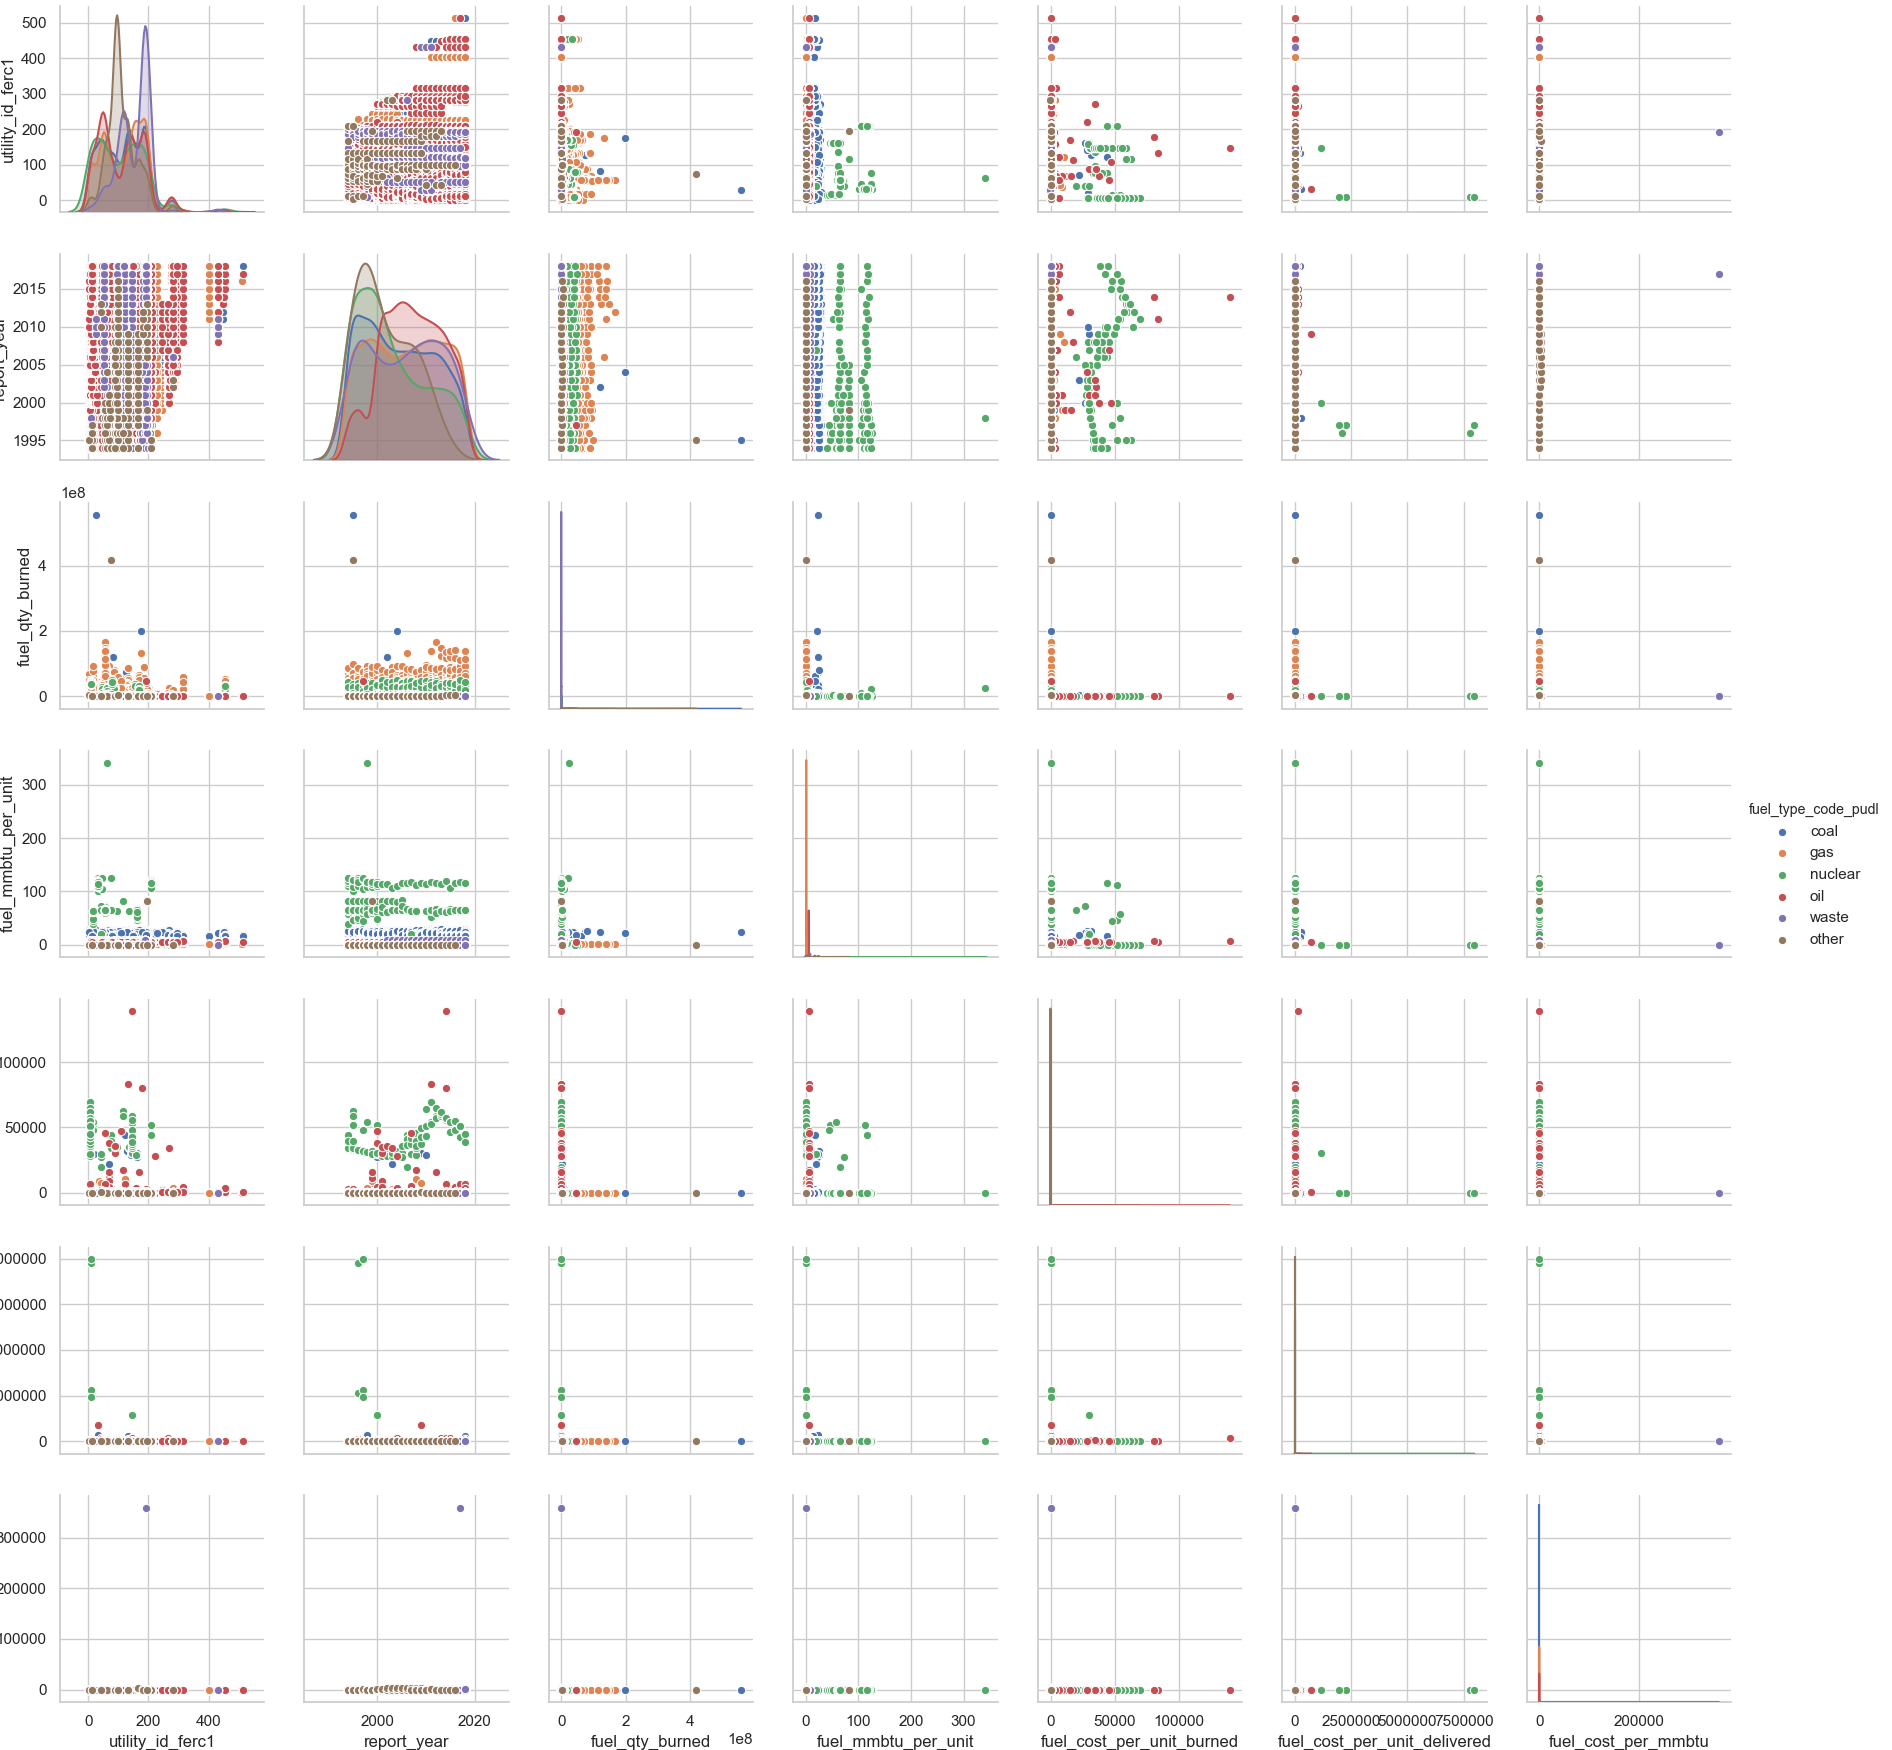

In [58]:
sns.pairplot(df,hue='fuel_type_code_pudl')
#plt.figure(figsize=(20,10))

    The Seaborn pairplot function shows the relationship betweeen all the numerical features present in the dataset. 
    From the several plots showing above we can determine the what type of supervised learning method to be used as a model to fit and train our data. But outliers present in the may affect the visual representations as such the pairplot function is used on sample of data below to compare the results of the 2 charts

<IPython.core.display.Javascript object>


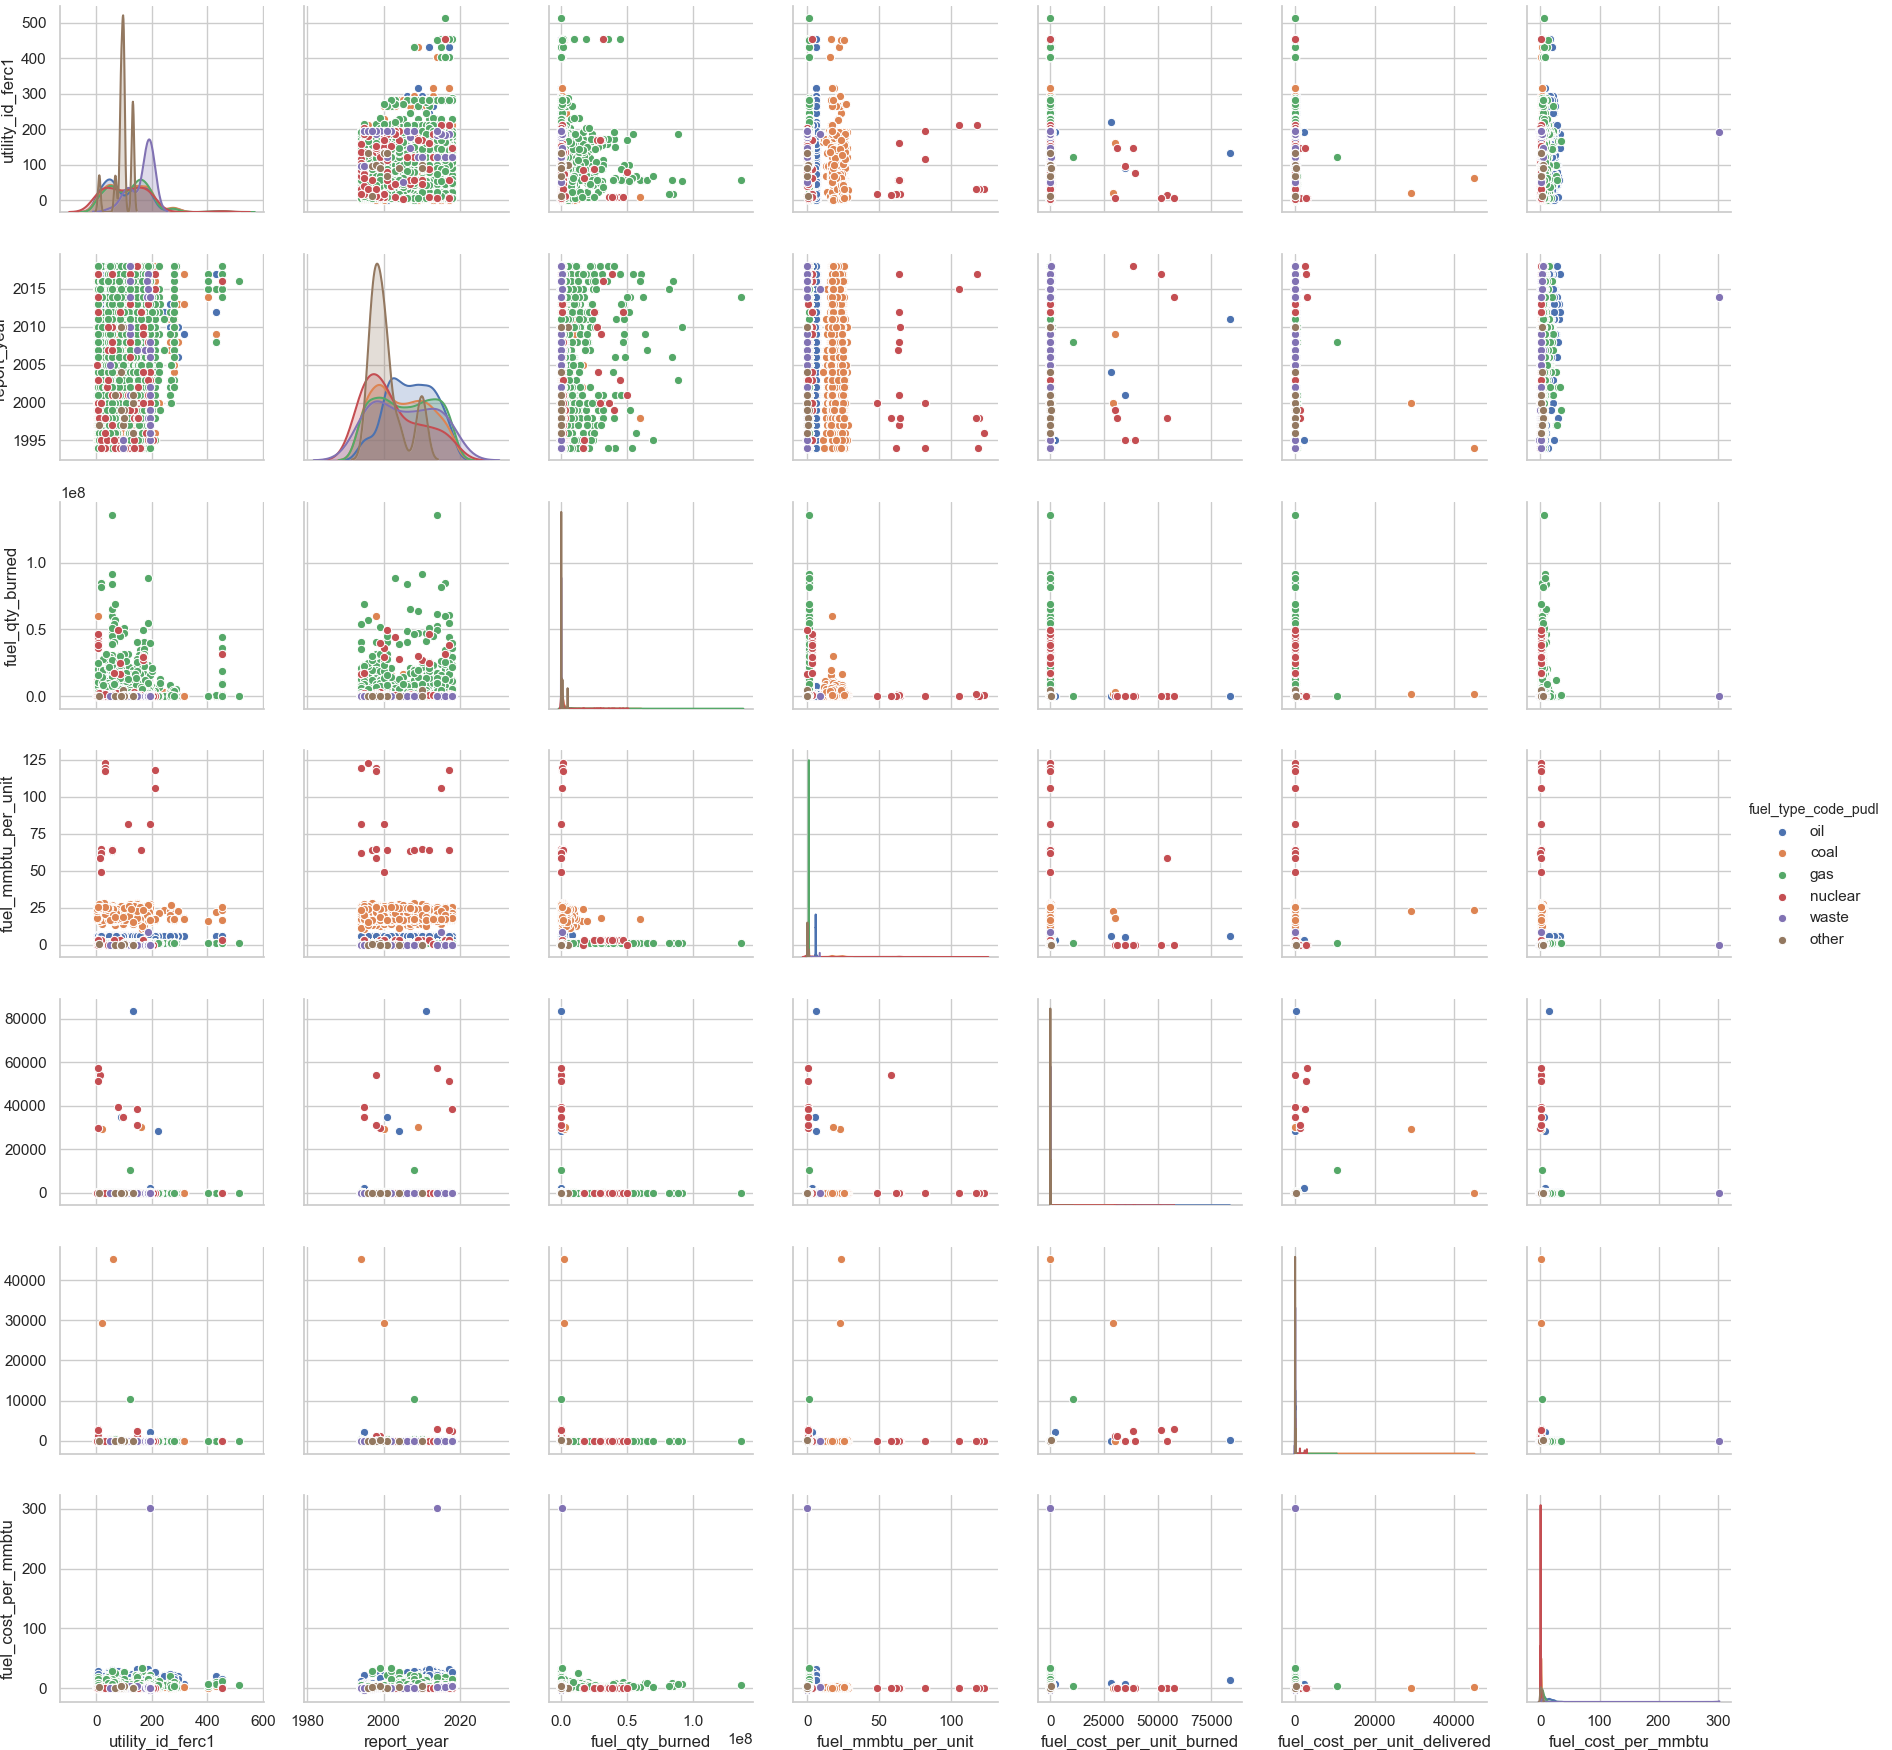

In [59]:
d=sns.pairplot(sample_df,hue='fuel_type_code_pudl')

In [60]:
#the skew and kurtosis functions help give insights on how our data is distributed for each rows.
df.skew()

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [61]:
df.kurtosis()

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

###  In Conclusion, different insights can be obtained from the visualizations from above and also steps on how to further analyse the data using the best model to avoid under-fitting or over-fitting.

    I would sincerely appreciate your feedback or comments on my method of approach and also how point out my errors in case of any.
